In [2]:
import os
os.chdir('/home/cs/Desktop/heart-disease-project/heart-disease-project/heart-disease-classification')

os.getcwd()

'/home/cs/Desktop/heart-disease-project/heart-disease-project/heart-disease-classification'

In [3]:
import pandas as pd


In [4]:

df=pd.read_csv('dataset/heart-disease.csv')


In [5]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

<Axes: xlabel='sex'>

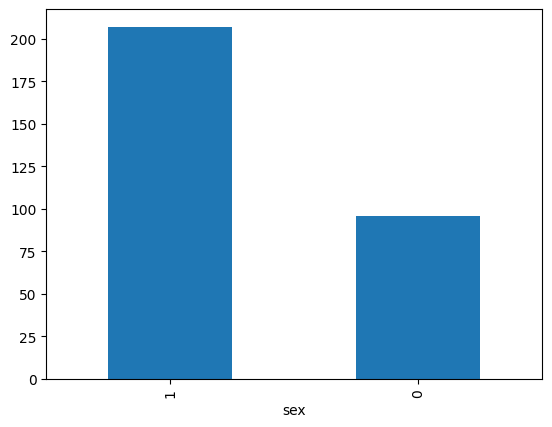

In [6]:
df['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='target'>

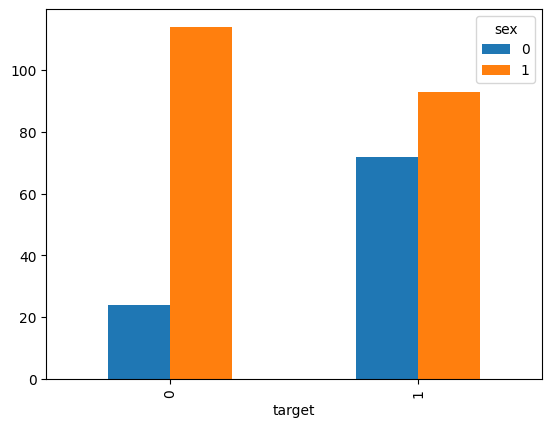

In [7]:
pd.crosstab(df.target,df.sex).plot(kind='bar')

<Axes: xlabel='thalach'>

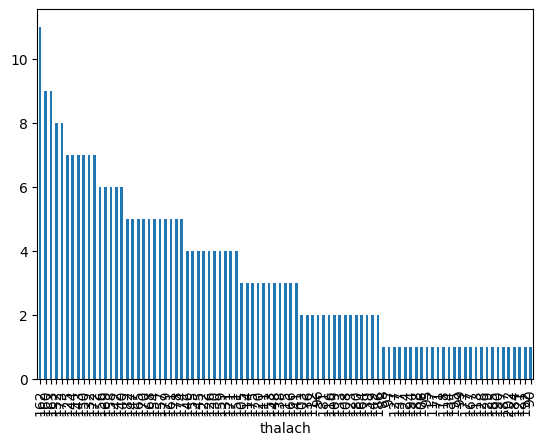

In [8]:
df['thalach'].value_counts().plot(kind='bar')

In [9]:
import matplotlib.pyplot as plt

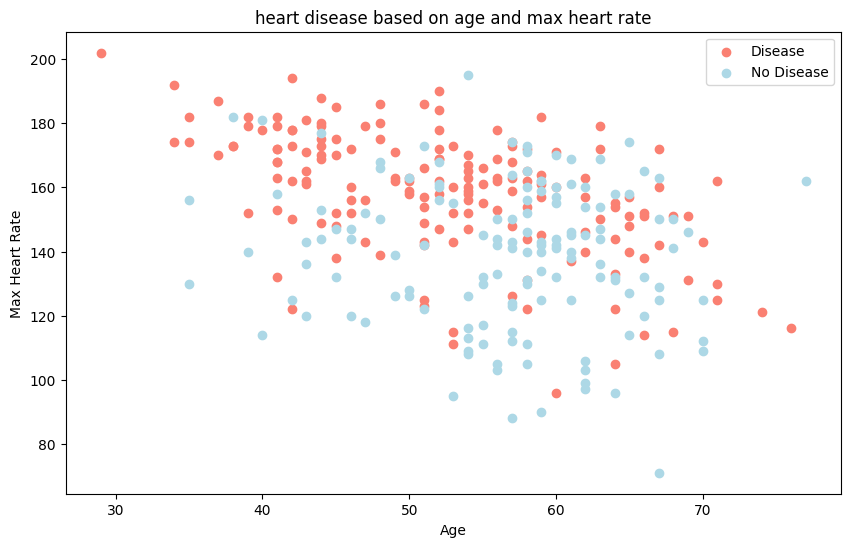

In [10]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')
plt.title('heart disease based on age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

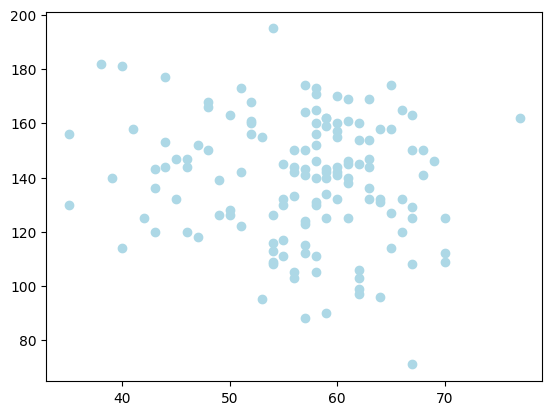

In [11]:
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

<Axes: ylabel='Frequency'>

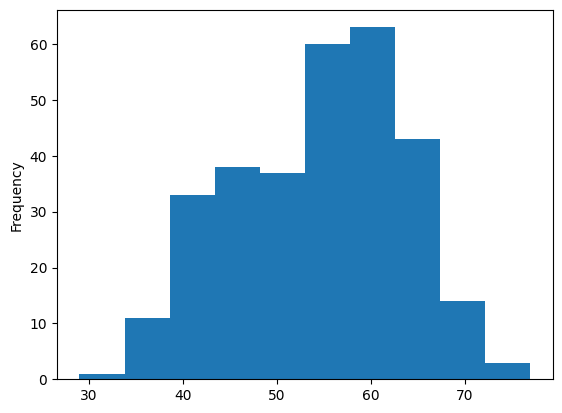

In [12]:
df.age.plot.hist()

In [13]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


/tmp/ipykernel_3148/513067550.py:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("No Disease","Disease")


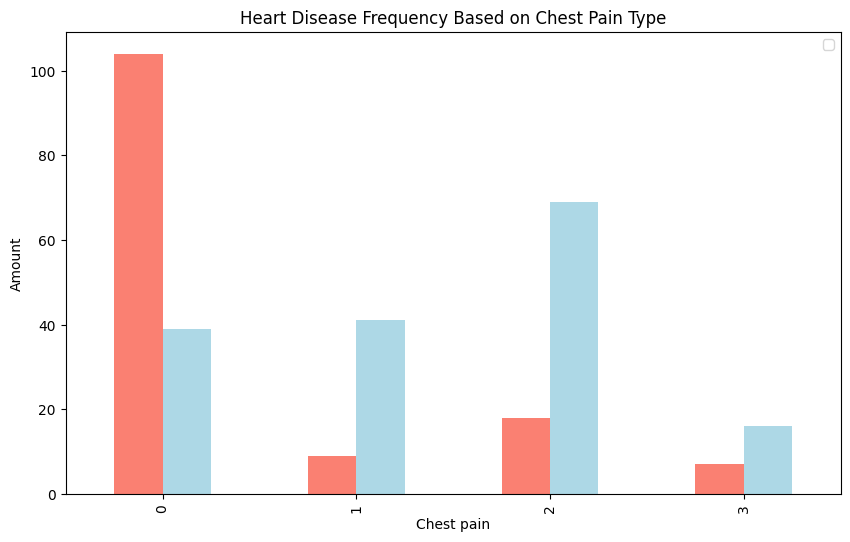

In [14]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue']
                                  )

plt.title('Heart Disease Frequency Based on Chest Pain Type')
plt.xlabel('Chest pain')
plt.ylabel('Amount')
plt.legend("No Disease","Disease")

In [61]:
df.head()
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [16]:
X=df.drop('target',axis=1)
y=df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
models={'Logistic Regression':LogisticRegression(),
        'KNN':KNeighborsClassifier(),
        'Random Forest':RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fit and Evaluate given ml Models
    models: different sckit-learn ml models

    """
    np.random.seed(42)

    model_scores={}

    for name,model in models.items():
        model.fit(X_train,y_train)

        model_scores[name]=model.score(X_test,y_test)


    return model_scores


In [19]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

/home/cs/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

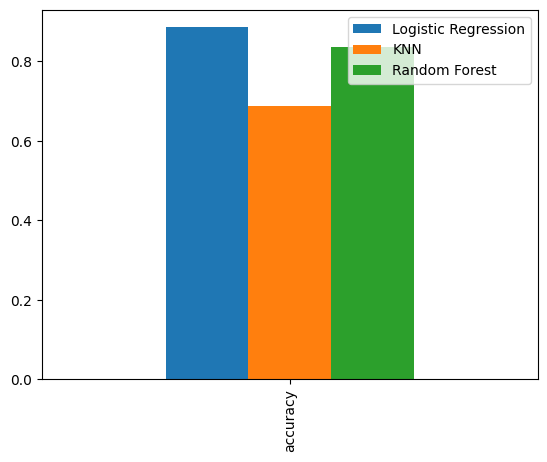

In [20]:
model_compare=pd.DataFrame(model_scores, index=['accuracy'])
model_compare.plot.bar()

Hyper Parameter Tunning For KNN

In [21]:
#hyper parameter tuning for knn

training_score=[]
test_score=[]

knn=KNeighborsClassifier()
neighbors=range(1,21)
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    training_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))
    



In [22]:
training_score
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

75.40983606557377


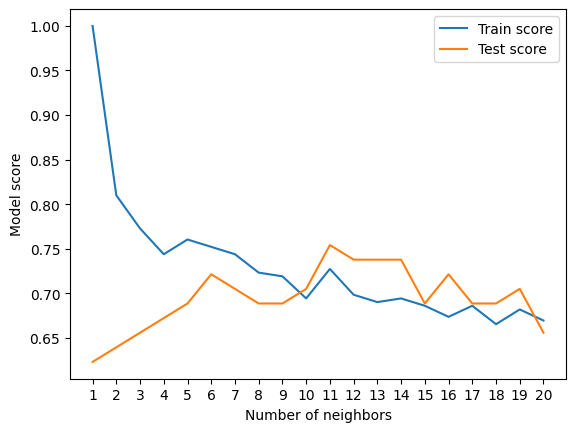

In [23]:
plt.plot(neighbors,training_score,label='Train score')
plt.plot(neighbors,test_score,label='Test score')
plt.xticks(range(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
print(max(test_score)*100)

Hyper Parameter Tunning Using RandomizedSearchCV

In [24]:
#create a hyperparameter grid for logisticregression

log_reg_grid={'C':np.logspace(-4,4,20),
              'solver':['liblinear']}

In [25]:
#create a hyperparameter grid for randomforestclassifier

rf_grid={'n_estimators':np.arange(10,1000,50),
         'max_depth':[None,3,5,10],
         'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf':np.arange(1,20,2)}

In [26]:
#tune LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

#setup random hyperparameter search for logisticregression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

#fit random hyperparameter search model for logisticregression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [28]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [32]:
#tune RandomforestClassifiers
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

np.random.seed(42)

#setup random hyperparameter search for RandomforestClassifiers
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

#fit random hyperparameter search model for RandomforestClassifiers
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [30]:
rs_rf.best_params_ 

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [31]:
rs_rf.score(X_test,y_test)

0.8688524590163934

Hyperparameter Tuning with GridSearchCV

In [34]:
log_reg_grid={'C':np.logspace(-4,4,30),
              'solver':['liblinear']}

gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [37]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [40]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

Evaluating our tuned model beyond accuracy

In [48]:
y_pred=gs_log_reg.predict(X_test)

In [42]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

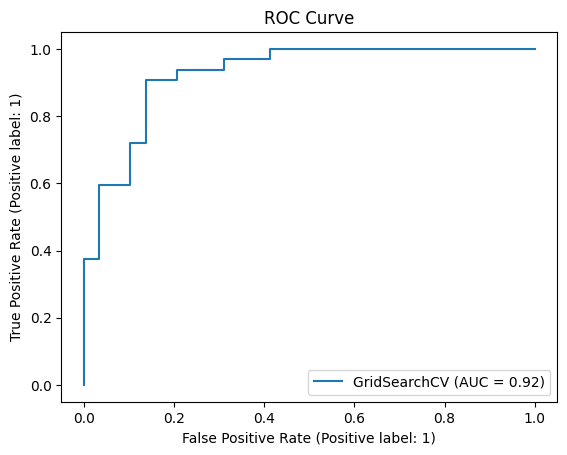

In [46]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.title("ROC Curve")
plt.show()

In [64]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[25,  4],
       [ 3, 29]])

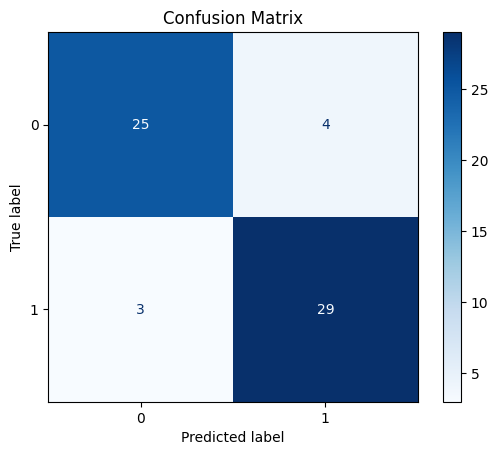

In [66]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()